In [495]:
#Importando as bibliotecas
import pandas as pd #Visualizações e manipulações dos dfs.
import numpy as np #Visualizações e manipulações dos arrays.

#Visualizações 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import statsmodels.api as sm #Análise estatística e modelagem estatística.
from sklearn.model_selection import train_test_split #Separar os dados em treino e teste.
from sklearn.linear_model import LinearRegression #Regressão linear com Scikit-learn
from sklearn import metrics #Calcular as métricas de desempenho do modelo

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor #Construção dos ensembles de regressão

In [496]:
#Importando o Dataset

mkt = pd.read_csv(r'C:\Users\cesar\Desktop\Data Student\DNC\Desafios\Desafio_4\MKT.csv')
mkt.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


# 1. Análise Descritiva

In [497]:
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


De acordo com o as informações apresentadas acima, o nosso conjunto de dados não apresenta dados nulos. E as 4 colunas estão no tipo correto.

In [498]:
#Verificando o nº de linhas duplicadas

print('Existe',mkt.duplicated().sum(),'linhas duplicadas no df.')

Existe 0 linhas duplicadas no df.


In [499]:
mkt.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


A partir da descrição acima podemos visualizar algumas informações importantes, como média dos valores por variável, desvio padrão, valor mínimo e máximo, e outros.  
Percebemos que a mídia que recebe maior investimento é o youtube, e que os valores investidos estão bem superiores aos faturamentos com as vendas.

# 02. Análise Exploratória

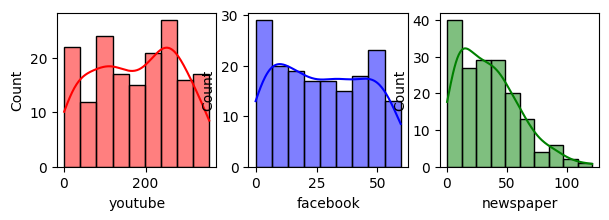

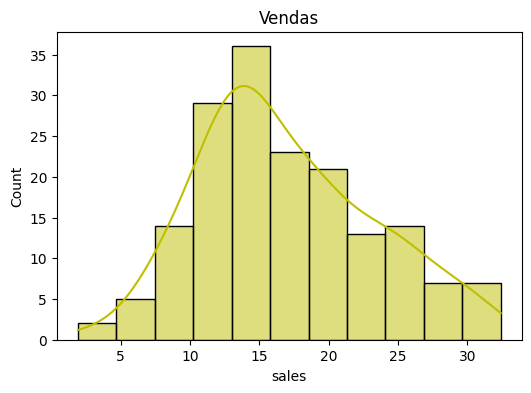

In [500]:
# Plotando a distribuição dos valores

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7,2))

sns.histplot(data=mkt, x="youtube", ax= axes[0], kde=True, color='r')
sns.histplot(data=mkt, x="facebook", ax= axes[1], kde=True, color='b')
sns.histplot(data=mkt, x="newspaper", ax= axes[2], kde=True, color='g')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(data=mkt, x="sales", kde=True, color='y')
plt.title('Vendas')
plt.show()

### Análise histogramas:  
Os histogramas acima apresentam uma visão sobre a distribuição dos valores de cada variável.  
**Youtube:** Maiores investimentos, e tem distribuição equilibrada em vários valores. Não apresenta uma tendência de investimento.  
**Facebook:**  Menores investimentos, e tem distribuição equilibrada em vários valores. Não apresenta uma tendência de investimento.  
**Newspaper:** Apresenta uma tendência de investimentos a esquerda, com valores inferiores.

## Outliers

In [501]:
# Boxplot
px.box()
fig = px.box(mkt, points="all")
fig.show()

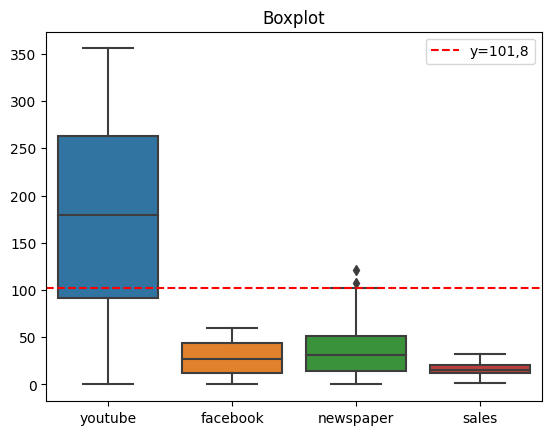

In [502]:
# Boxplot

ax =sns.boxplot(data=mkt)
ax.axhline(y=101.8, color='r', linestyle='--', label='y=101,8')
plt.title('Boxplot')
plt.legend()
plt.show()

In [503]:
mkt[mkt['newspaper'] > 102]

,youtube,facebook,newspaper,sales
46,20.28,52.44,107.28,10.44
72,355.68,43.56,121.08,28.56


**Outliers:**  
Com o uso do boxplot visualizamos que somente os investimentos em newspaper apresentam outliers. Fato que é confirmado com os histogramas anteriores.

## Investimento total por canal

In [504]:
canal_soma = mkt.sum()
canal_soma =  pd.DataFrame(canal_soma).reset_index()
canal_soma = canal_soma.drop(3)
canal_soma.rename(columns = {'index': 'Canal',0:'R$'},inplace = True)
canal_soma = canal_soma.sort_values('R$', ascending=False)
canal_soma

,Canal,R$
0,youtube,30441.60
2,newspaper,6026.04
1,facebook,4731.84


In [505]:

total_canal_soma = canal_soma['R$'].sum()
print('Soma total do investimento em mkt:',round(total_canal_soma,2))
sales_soma = mkt['sales'].sum()
print('Soma total do faturamento em vendas: R$', round(sales_soma,2))
print('ROI:',round(sales_soma/total_canal_soma, 4) )

Soma total do investimento em mkt: 41199.48
Soma total do faturamento em vendas: R$ 2893.8
ROI: 0.0702


## Correlações

In [506]:
mkt.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


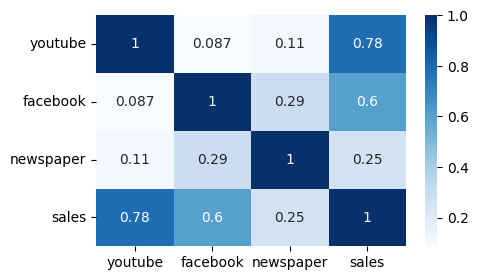

In [507]:
plt.figure(figsize=(5,3))
sns.heatmap(data= mkt.corr(), annot = True, cmap='Blues')
plt.show()

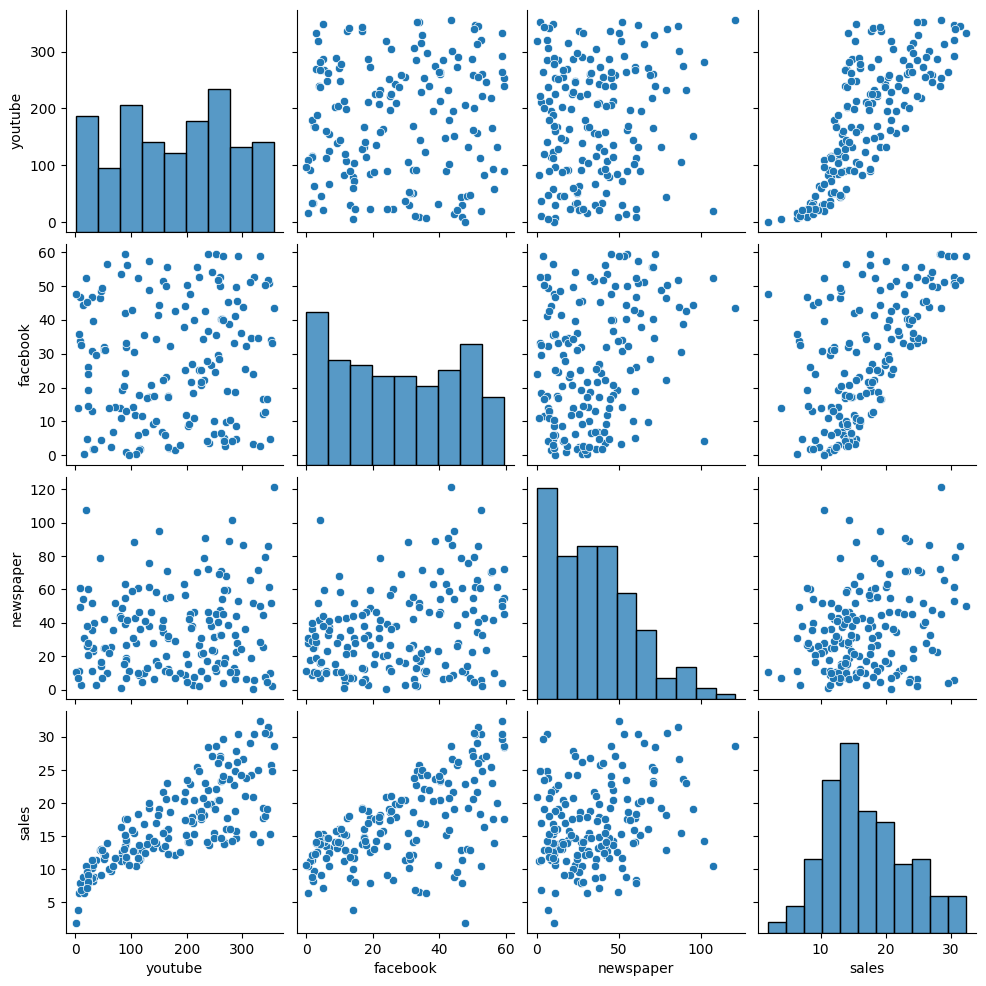

In [508]:
sns.pairplot(mkt)
plt.show()

### Análise correlações:  
Mapeando a correlação entre as variáveis começamos a entender quantitativamente a influência de cada variável independente nos resultados de vendas. E percebemos que o investimento em newspaper é de baixo retorno, e o facebook e youtube tem valores de correlação interesantes.

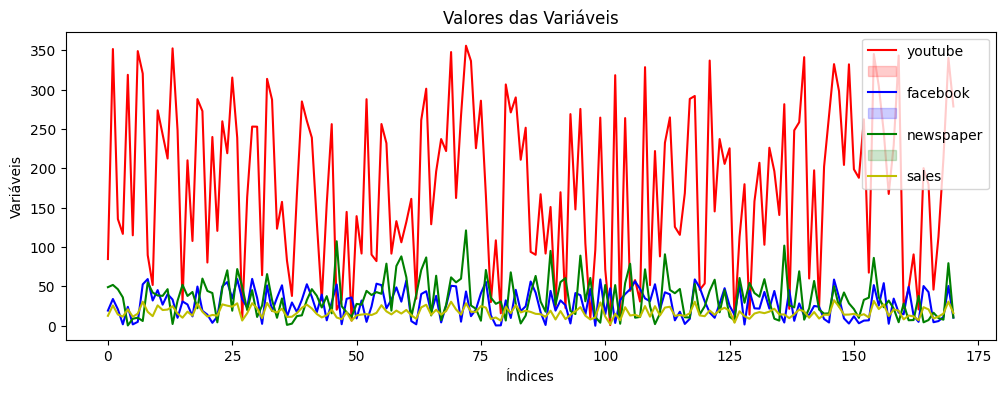

In [509]:
# Visualização gráfica ao longo do tempo

mkt2 = mkt.copy()
mkt2['index_col'] = mkt2.reset_index()['index']

plt.figure(figsize=(12,4))
sns.lineplot(data=mkt2, x= 'index_col', y='youtube', color='r')
sns.lineplot(data=mkt2, x= 'index_col', y='facebook', color='b')
sns.lineplot(data=mkt2, x= 'index_col', y='newspaper', color='g')
sns.lineplot(data=mkt2, x= 'index_col', y='sales', color='y')
plt.legend(['youtube','','facebook','','newspaper','','sales'], loc='upper right')
plt.title('Valores das Variáveis')
plt.ylabel('Variáveis')
plt.xlabel('Índices')
plt.show()

**Atenção:**  
As conclusões a partir do gráfico acima devem ser tomadas com cuidado, pois o conjunto de dados não contém um marcador temporal. Sendo assim o eixo x foi construido utilizando os índices.

# 03. Modelagem

In [510]:
# Definindo as variáveis explicativas e a variável resposta.

y= mkt.sales
x= sm.add_constant(mkt[['youtube', 'facebook', 'newspaper']])

In [511]:
# Gerando o modelo estatístico.

model = sm.OLS(y,x)
result = model.fit()

In [512]:
#Visualizando o resultado.

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     503.7
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           2.09e-83
Time:                        13:58:20   Log-Likelihood:                -359.99
No. Observations:                 171   AIC:                             728.0
Df Residuals:                     167   BIC:                             740.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5059      0.400      8.772      0.0

In [513]:
#O r² está alto, porém o p-value da variável "newspaper" está muito alto. Sendo assim, ela não pode ser utilizada. 

y= mkt.sales
x= sm.add_constant(mkt[['youtube', 'facebook']])
model = sm.OLS(y,x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     757.8
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           8.33e-85
Time:                        13:58:20   Log-Likelihood:                -360.21
No. Observations:                 171   AIC:                             726.4
Df Residuals:                     168   BIC:                             735.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5937      0.376      9.555      0.0

**Obs:**

O dataset trabalhado não necessita da ultilização de algum método de codificação dos atributos, pois todas são quantitativas.  
E também não requer normalização, pois as 4 colunas estão na mesma escala.

## Modelo usando a Scikit-learn

In [514]:
#Separando os dado para treino e para teste.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Treinando o modelo com regressão linear usando os dados de treino.
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [515]:
#r² do modelo de treino

r_sq_train = lr.score(x_train,y_train)
print('r² (treino):',r_sq_train)

r² (treino): 0.8906451392330468


In [516]:
#Predizendo os valores de y baseado nos valores de treino de x. 
y_pred_train = lr.predict(x_train)

#Calculando as metricas de qualidade dos resultados de y preditos acima.
print("MAE (treino): ", metrics.mean_absolute_error(y_train,y_pred_train))
print("MSE (treino): ", metrics.mean_squared_error(y_train,y_pred_train))
print("RMSE (treino): ", np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

MAE (treino):  1.4863527361083928
MSE (treino):  4.111631820736484
RMSE (treino):  2.027715912236348


Dados de teste

In [517]:
# Treinando o modelo com regressão linear usando os dados de teste.
lr.fit(x_test, y_test)

LinearRegression()

In [518]:
# r² do modelo de teste

r_sq_test = lr.score(x_test,y_test)
print('r² (teste):',r_sq_test)

r² (teste): 0.9388840021342563


In [519]:
# Predizendo os valores de y baseado nos valores de treino de x. 
y_pred_test = lr.predict(x_test)

# Calculando as metricas de qualidade dos resultados de y preditos acima.
print("MAE (teste): ", metrics.mean_absolute_error(y_test,y_pred_test))
print("MSE (teste): ", metrics.mean_squared_error(y_test,y_pred_test))
print("RMSE (teste): ", np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

MAE (teste):  1.2794766667395967
MSE (teste):  2.7608231354523505
RMSE (teste):  1.6615724887745194


**Análise:**

O modelo se comportou bem com os dados de treino(r² = 0.86885), e apresentou um r² melhor quando avaliado com a base para teste.  
Quando aferido as métricas de erro médio, foi encontrado bons resultado. E estes resultados melhoraram diante da base de teste.

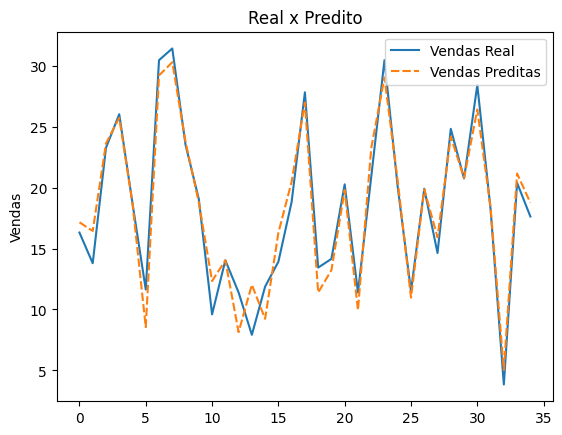

In [520]:
#Gráfico que apresenta os valores reais de vendas e os valores preditos pelo modelo.

df_results = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_test})
df_results.reset_index(drop=True, inplace=True)

plt.figure()
sns.lineplot(data=df_results, errorbar=None)
plt.legend(['Vendas Real', 'Vendas Preditas'], loc='upper right')
plt.title('Real x Predito')
plt.ylabel('Vendas')
plt.show()

# Regressão linear com árvores

## Treino com Random Forest Regressor

In [521]:
# Treinando o modelo com regressão linear usando Random Forest.

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [522]:
# Usando o metódo Random Forest nos dados de teste.
pred_rf = rf.predict(x_test)

In [523]:
# Avaliando a qualidade do modelo.

r_sq_rf = rf.score(x,y)
print('Coeficiente de Determinação (R²):', r_sq_rf)
print()
print('MAE:', metrics.mean_absolute_error(y_test, pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_rf)))

Coeficiente de Determinação (R²): 0.9910855774675126

MAE: 0.8063314285714261
MSE: 1.0835591040000052
RMSE: 1.0409414508030723


## Treino com AdaBoost

In [524]:
ab = AdaBoostRegressor(n_estimators=100, random_state=42)
ab.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [525]:
# Predizendo os dados de teste.
ab_pred = ab.predict(x_test)

In [526]:
# Avaliando a qualidade do modelo.

r_sq_ab = ab.score(x,y)
print('Coeficiente de Determinação (R²):', r_sq_ab)
print()
print('MAE:', metrics.mean_absolute_error(y_test, ab_pred))
print('MSE:', metrics.mean_squared_error(y_test, ab_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ab_pred)))

Coeficiente de Determinação (R²): 0.9753706137339516

MAE: 1.0404972419356207
MSE: 1.5428983382897943
RMSE: 1.2421345894426232


## Treino com Gradient Boosting Regressor

In [527]:
gd = GradientBoostingRegressor(n_estimators=100, random_state=42)
gd = gd.fit(x_train, y_train)

In [528]:
# Predizendo os dados de teste.

gd_pred = gd.predict(x_test)

In [529]:
# Avaliando a qualidade do modelo.

r_sq_gd = gd.score(x,y)
print('Coeficiente de Determinação (R²):', r_sq_gd)
print()
print('MAE:', metrics.mean_absolute_error(y_test, gd_pred))
print('MSE:', metrics.mean_squared_error(y_test, gd_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gd_pred)))

Coeficiente de Determinação (R²): 0.9949776864315343

MAE: 0.6720118326092344
MSE: 0.8239521887275911
RMSE: 0.9077181218459788


### Análise das florestas:

Ao compararmos as métricas dos diferentes modelos construídos, concluímos que a técnica de floresta apresenta resultados mais satisfatórios, e em particular, o modelo Gradient Boosting Regressor se destaca como o líder em termos de desempenho.

# Análise Final

Ao analisar todos os indicadores presentes no DataFrame, fica perceptível que o retorno sobre os investimentos em marketing está baixo, indicando a necessidade de reavaliar a estratégia adotada. Ao longo do período analisado, foram investidos um total de R\\$ 41.199,48, porém o faturamento obtido foi de apenas R\\$ 2.893,80, resultando em um ROI (Retorno sobre Investimento) de 0.0702.  

Uma observação relevante é que os valores das vendas apresentaram um baixo desvio padrão de 6.31, indicando que tiveram pouca amplitude ao longo do período analisado e demonstram uma série estacionária, e não apresenta tendência. Isso sugere que a estratégia de marketing atual não está gerando alteração expressiva nos resultados.  

Com o objetivo de melhorar o ROI, é recomendado a realocação de recursos entre os canais de marketing. Sugere-se descontinuar os investimentos em jornais e alocar esses recursos no Facebook, pois este canal apresenta um coeficiente melhor (0.1884) em comparação ao jornal (0.0043). Para embasar essa decisão, foi utilizado um modelo de gradient boosting que foi previamente treinado. Com essa realocação de recursos, ao simular o novo cenário proposto, foram obtidos excelentes resultados, representados por um aumento de ganho de R\\$ 577.33, o que corresponde a um aumento de 19,95\% no faturamento. 

Para melhorar a qualidade dos dados, é aconselhável registrar a data de cada ocorrência no DataFrame. Isso permitirá evoluir a qualidade das análises e das previsões, uma vez que será possível associar os eventos com fatores externos, melhorar a construção dos gráficos de linha e entender a regularidade temporal dos resultados.  

Além da análise da distribuição de recursos por canais de marketing, é uma excelente ideia classificar os formatos, conteúdos, personas, datas de lançamento, entre outros do material divulgado para ampliar ainda mais os resultados. E assim utilizar machine learning para avaliar o potencial de cada material em gerar resultados de vendas.

## Predizendo o novo cenário proposto

In [530]:
# Novo df em que os recursos da coluna newspaper foram transferidos integralmente para o facebook.

mkt2 = mkt[:]
mkt2['facebook'] = mkt['facebook'] + mkt['newspaper']
mkt2.drop('newspaper' , axis=1, inplace=True)

In [531]:
# Definindo as variáveis x e y usando o novo df "mkt2"

y= mkt2.sales
x= sm.add_constant(mkt2[['youtube', 'facebook']])

In [532]:
#Predizendo os novos valores de vendas baseados no novo cenario, utilizando o modelo Gradient Boosting treinado anteriomente.

gd_pred2 = gd.predict(x)

In [533]:
# Inserindo as predições no df "mkt2" 

mkt2['novas_vendas'] = gd_pred2

# Criando uma coluna que compara os valores preditos com os reais.

mkt2['comparação'] = mkt2['novas_vendas']/mkt2['sales']
mkt2.head()

,youtube,facebook,sales,novas_vendas,comparação
0,84.72,68.16,12.60,15.602550,1.238298
1,351.48,85.80,25.68,32.369334,1.260488
2,135.48,67.20,14.28,20.586111,1.441604
3,116.64,37.80,11.52,16.044034,1.392711
4,318.72,24.36,20.88,19.712689,0.944094


### Avaliando os resultados da predições.

In [534]:
print(mkt2['comparação'].describe())

'''
- média de aumento muito boa, com 22,4%.
- Desvio padrão normal, com 0,22.
- E ganho de peformace de até 208%.
'''

count    171.000000
mean       1.224367
std        0.221304
min        0.883719
25%        1.066491
50%        1.174740
75%        1.299085
max        2.086732
Name: comparação, dtype: float64


'\n- média de aumento muito boa, com 22,4%.\n- Desvio padrão normal, com 0,22.\n- E ganho de peformace de até 208%.\n'

In [535]:
# 13 registro apresentaram uma perda de resultados.

print('Qº com performance negativa:', len(mkt2[mkt2['comparação'] <= 1]))
display(mkt2[mkt2['comparação'] <= 1])

Qº com performance negativa: 13


,youtube,facebook,sales,novas_vendas,comparação
4,318.72,24.36,20.88,19.712689,0.944094
8,89.64,114.12,17.64,16.982107,0.962704
26,238.68,131.28,28.44,26.236431,0.922519
37,37.80,32.16,11.40,10.751046,0.943074
49,6.48,47.16,6.36,6.161793,0.968835
54,82.08,96.12,16.32,14.422290,0.883719
76,165.48,126.48,23.04,22.312805,0.968438
85,93.84,97.56,17.52,17.470310,0.997164
99,264.36,62.64,29.64,29.425075,0.992749
103,10.08,35.16,6.84,6.638968,0.970609


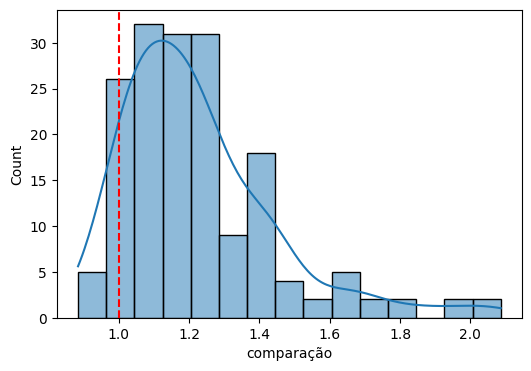

In [536]:
# distribuição dos valores da nova peformace.

plt.figure(figsize=(6,4))
hist = sns.histplot(data=mkt2, x="comparação", kde=True)
hist.axvline(x=1, color='r', linestyle='--')
plt.show()

In [560]:
#Comparação da variação do faturamento de vendas.

novas_vendas_soma = mkt2['novas_vendas'].sum()

print('Faturamento total real:',round(sales_soma,2))
print('Faturamento total predito',round(novas_vendas_soma,2))
print('Valor bruto da variação de faturamento:',round(novas_vendas_soma-sales_soma,2))
print('% da variação de faturamento',round((novas_vendas_soma-sales_soma)/sales_soma,4))


Faturamento total real: 2893.8
Faturamento total predito 3471.13
Valor bruto da variação de faturamento: 577.33
% da variação de faturamento 0.1995
